<center><h1>EEG Signal Classification</h1></center></br>
<center><h1>By</h1></center></br>
<center><h2>Seif Mosad Abdelfattah 20180128</h2></center></br>
<center><h2>Sherif Magdy Abdelallah 20180133</h2></center></br>
<center><h2>Marina Moheb Nafee 20180208</h2></center></br>

##Installing Some Packages

In [ ]:
!pip install mne
!pip install mne_features

##Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.time_frequency import psd_welch
from mne.datasets.sleep_physionet.age import fetch_data

##Get Data (21 Sample) && Some Pre-processing

In [ ]:
raw_train = []
annot_train = []
mapping = {'EOG horizontal': 'eog',
           'Resp oro-nasal': 'resp',
           'EMG submental': 'emg',
           'Temp rectal': 'misc',
           'Event marker': 'misc'}
for i in range(21):
  a = fetch_data(subjects=[i], recording=[1])
  raw_train.append(mne.io.read_raw_edf(a[0][0]))
  annot_train.append(mne.read_annotations(a[0][1]))
  raw_train[i].set_annotations(annot_train[i], emit_warning = False)
  raw_train[i].set_channel_types(mapping)

Using default location ~/mne_data for PHYSIONET_SLEEP...
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Using default location ~/mne_data for PHYSIONET_SLEEP...
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4011E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Using default location ~/mne_data for PHYSIONET_SLEEP...
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4021E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Using default location ~/mne_data for PHYSIONET_SLEEP...
Extracting EDF parameters from /root/mne_data/physionet-sleep-data/SC4031E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Using default location ~/mne_data for PHYSIONET_SLEEP...
Extracting EDF parameters from /roo

In [ ]:
raw_train[20]

<RawEDF | SC4201E0-PSG.edf, 7 x 8412000 (84120.0 s), ~12 kB, data not loaded>

In [ ]:
for i in range(21):
  set(raw_train[i].get_channel_types())
  set(raw_train[i].annotations.description)
  raw_train[i].get_data().shape[1]/raw_train[i].info['sfreq']/60/60
  set(raw_train[i].ch_names)

In [ ]:
events_trains = []
annotation_desc_2_event_id = {'Sleep stage W': 1,
                              'Sleep stage 1': 2,
                              'Sleep stage 2': 3,
                              'Sleep stage 3': 4,
                              'Sleep stage 4': 4,
                              'Sleep stage R': 5}

# keep last 30-min wake events before sleep and first 30-min wake events after
# sleep and redefine annotations on raw data
for i in range(21):
  annot_train[i].crop(annot_train[i][1]['onset'] - 30 * 60,
                  annot_train[i][-2]['onset'] + 30 * 60)
  raw_train[i].set_annotations(annot_train[i], emit_warning=False)
  events_train, _ = mne.events_from_annotations(
    raw_train[i], event_id=annotation_desc_2_event_id, chunk_duration=30.)
  events_trains.append(events_train)

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage R', 'Sleep stage W']
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']
Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 

In [ ]:
event_id = {'Sleep stage W': 1,
            'Sleep stage 1': 2,
            'Sleep stage 2': 3,
            'Sleep stage 3/4': 4,
            'Sleep stage R': 5}
epochs_trains = []
for i in range(21):
  tmax = 30. - 1. / raw_train[i].info['sfreq']  # tmax in included
  reject_criteria = dict(
                       eeg=150e-6,       # 150 µV
                       eog=250e-6)       # 250 µV
  epochs_trains.append(mne.Epochs(raw=raw_train[i], events=events_trains[i],
                          event_id=event_id, tmin=0., tmax=tmax, baseline=None, reject=reject_criteria))

Not setting metadata
Not setting metadata
841 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
Not setting metadata
1103 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
Not setting metadata
1025 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
Not setting metadata
952 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
Not setting metadata
1235 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
Not setting metadata
672 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
Not setting metadata
843 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
Not setting metadata
976 matching events found
No baseline correction applied
0 

In [ ]:
epochs_trains[20].get_data().shape

Loading data for 1022 events and 3000 original time points ...
    Rejecting  epoch based on EEG : ['EEG Fpz-Cz']
    Rejecting  epoch based on EEG : ['EEG Fpz-Cz']
    Rejecting  epoch based on EEG : ['EEG Fpz-Cz']
    Rejecting  epoch based on EEG : ['EEG Fpz-Cz']
    Rejecting  epoch based on EEG : ['EEG Fpz-Cz']
    Rejecting  epoch based on EEG : ['EEG Fpz-Cz']
    Rejecting  epoch based on EEG : ['EEG Fpz-Cz', 'EEG Pz-Oz']
    Rejecting  epoch based on EEG : ['EEG Fpz-Cz']
    Rejecting  epoch based on EEG : ['EEG Fpz-Cz', 'EEG Pz-Oz']
    Rejecting  epoch based on EEG : ['EEG Fpz-Cz']
    Rejecting  epoch based on EEG : ['EEG Fpz-Cz', 'EEG Pz-Oz']
    Rejecting  epoch based on EEG : ['EEG Fpz-Cz', 'EEG Pz-Oz']
    Rejecting  epoch based on EEG : ['EEG Fpz-Cz']
    Rejecting  epoch based on EEG : ['EEG Fpz-Cz']
    Rejecting  epoch based on EEG : ['EEG Fpz-Cz']
    Rejecting  epoch based on EEG : ['EEG Fpz-Cz']
    Rejecting  epoch based on EEG : ['EEG Fpz-Cz']
    Rejecting  epo

(558, 7, 3000)

In [ ]:
for i in epochs_trains:
  print(i.get_data().shape)

Streaming output truncated to the last 5000 lines.
    Rejecting  epoch based on EOG : ['EOG horizontal']
    Rejecting  epoch based on EOG : ['EOG horizontal']
    Rejecting  epoch based on EOG : ['EOG horizontal']
    Rejecting  epoch based on EOG : ['EOG horizontal']
    Rejecting  epoch based on EOG : ['EOG horizontal']
    Rejecting  epoch based on EOG : ['EOG horizontal']
    Rejecting  epoch based on EOG : ['EOG horizontal']
    Rejecting  epoch based on EOG : ['EOG horizontal']
    Rejecting  epoch based on EOG : ['EOG horizontal']
    Rejecting  epoch based on EOG : ['EOG horizontal']
    Rejecting  epoch based on EOG : ['EOG horizontal']
    Rejecting  epoch based on EOG : ['EOG horizontal']
    Rejecting  epoch based on EOG : ['EOG horizontal']
    Rejecting  epoch based on EOG : ['EOG horizontal']
    Rejecting  epoch based on EOG : ['EOG horizontal']
    Rejecting  epoch based on EOG : ['EOG horizontal']
    Rejecting  epoch based on EOG : ['EOG horizontal']
    Rejecting 

##Split Data's Epochs Into (16 Training Epochs) and (5 Testing Epochs)

In [ ]:
x_train_epochs = []
y_train_epochs = []
x_test_epochs = []
y_test_epochs = []
for i in range(21):
  if(i < 16):
    x_train_epochs.append(epochs_trains[i].get_data()[:,:2,:])
    y_train_epochs.append(epochs_trains[i].events[:,2])
  else:
    x_test_epochs.append(epochs_trains[i].get_data()[:,:2,:])
    y_test_epochs.append(epochs_trains[i].events[:,2])

Loading data for 345 events and 3000 original time points ...
Loading data for 714 events and 3000 original time points ...
Loading data for 522 events and 3000 original time points ...
Loading data for 380 events and 3000 original time points ...
Loading data for 794 events and 3000 original time points ...
Loading data for 240 events and 3000 original time points ...
Loading data for 221 events and 3000 original time points ...
Loading data for 572 events and 3000 original time points ...
Loading data for 167 events and 3000 original time points ...
Loading data for 656 events and 3000 original time points ...
Loading data for 748 events and 3000 original time points ...
Loading data for 566 events and 3000 original time points ...
Loading data for 815 events and 3000 original time points ...
Loading data for 421 events and 3000 original time points ...
Loading data for 466 events and 3000 original time points ...
Loading data for 484 events and 3000 original time points ...
Loading 

In [ ]:
x_test_epochs[0].shape
y_test_epochs[0].shape

##Stacking The Epochs (Vertically && Horizontally)

In [ ]:
x_trainn = np.vstack(x_train_epochs)
y_trainn = np.hstack(y_train_epochs)
x_testt = np.vstack(x_test_epochs)
y_testt = np.hstack(y_test_epochs)

In [ ]:
print(x_trainn.shape, y_trainn.shape)
print(x_testt.shape, y_testt.shape)

(8111, 2, 3000) (8111,)
(2981, 2, 3000) (2981,)


##Define Features Extration Functions

In [ ]:
from scipy import stats
from mne_features.feature_extraction import extract_features
def mean(x):
  return np.mean(x, axis = -1)
def std(x):
  return np.std(x, axis = -1)
def ptp(x):
  return np.ptp(x, axis = -1)
def var(x):
  return np.var(x, axis = -1)
def minim(x):
  return np.min(x, axis = -1)
def maxim(x):
  return np.max(x, axis = -1)
def argminim(x):
  return np.argmin(x, axis = -1)
def argmaxim(x):
  return np.argmax(x, axis = -1)
def rms(x):
  return np.sqrt(np.mean(x**2, axis = -1))
def abs_diff_signal(x):
  return np.sum(np.abs(np.diff(x, axis = -1)), axis = -1)
def skewness(x):
  return stats.skew(x, axis = -1)
def kurtosis(x):
  return stats.kurtosis(x, axis = -1)
def concatenate_features(x):
  return np.concatenate((mean(x), std(x),ptp(x) ,var(x) ,minim(x),maxim(x),argminim(x),argmaxim(x),rms(x),abs_diff_signal(x),skewness(x),kurtosis(x)), axis = -1)         

##Extract Features for (Training && Testing Epochs) to Get (Training && Testing Data)

In [ ]:
x_train_features = []
x_test_features = []
for i in x_trainn:
  x_train_features.append(concatenate_features(i))
for i in x_testt:
  x_test_features.append(concatenate_features(i))

In [ ]:
x_train_features = np.array(x_train_features)
x_test_features = np.array(x_test_features)

In [ ]:
x_test_features.shape 

(2981, 24)

##Model #1 "Random Forest Classifier"

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report
from matplotlib import pyplot

model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model.fit(x_train_features, y_trainn)

RandomForestClassifier(random_state=42)

Accuracy score: 0.692720563569272
Report score:
                 precision    recall  f1-score   support

  Sleep stage W       0.24      0.15      0.18       170
  Sleep stage 1       0.54      0.10      0.17       153
  Sleep stage 2       0.74      0.92      0.82      1969
Sleep stage 3/4       0.83      0.50      0.63       177
  Sleep stage R       0.43      0.23      0.30       512

       accuracy                           0.69      2981
      macro avg       0.55      0.38      0.42      2981
   weighted avg       0.65      0.69      0.65      2981

Feature: 0, Score: 0.03227
Feature: 1, Score: 0.02523
Feature: 2, Score: 0.05589
Feature: 3, Score: 0.03269
Feature: 4, Score: 0.09576
Feature: 5, Score: 0.05847
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.06469
Feature: 9, Score: 0.03950
Feature: 10, Score: 0.05577
Feature: 11, Score: 0.04119
Feature: 12, Score: 0.02974
Feature: 13, Score: 0.02888
Feature: 14, Score: 0.02940
Feature: 15, Score: 0.0289

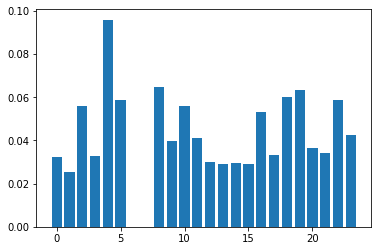

In [ ]:
y_pred = model.predict(x_test_features)
acc = accuracy_score(y_testt, y_pred)
print("Accuracy score: {}".format(acc))
report=classification_report(y_testt, y_pred,target_names=event_id.keys())
print("Report score:")
print(report)
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
import tensorflow as tf
import seaborn as sn

Text(69.0, 0.5, 'Truth')

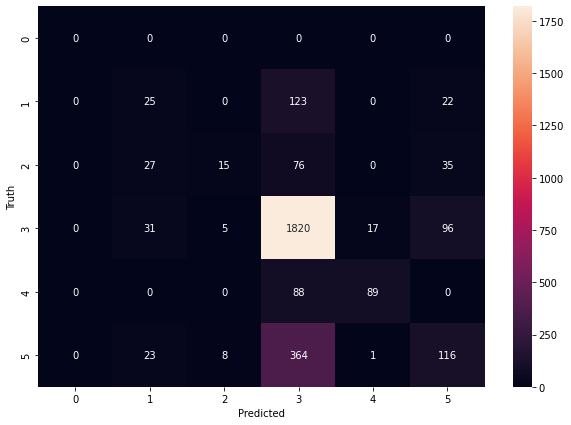

In [ ]:
cm = tf.math.confusion_matrix(labels = y_testt, predictions = y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##Model #2 "Gradient Boosting Classifier"

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=170, random_state=42)
clf.fit(x_train_features, y_trainn)

GradientBoostingClassifier(n_estimators=170, random_state=42)

Accuracy score: 0.618919825561892
Report score:
                 precision    recall  f1-score   support

  Sleep stage W       0.11      0.28      0.16       170
  Sleep stage 1       0.35      0.06      0.10       153
  Sleep stage 2       0.74      0.82      0.78      1969
Sleep stage 3/4       0.79      0.45      0.57       177
  Sleep stage R       0.41      0.20      0.27       512

       accuracy                           0.62      2981
      macro avg       0.48      0.36      0.37      2981
   weighted avg       0.63      0.62      0.61      2981

Feature: 0, Score: 0.00569
Feature: 1, Score: 0.00900
Feature: 2, Score: 0.01816
Feature: 3, Score: 0.00845
Feature: 4, Score: 0.28089
Feature: 5, Score: 0.10566
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.03037
Feature: 9, Score: 0.01534
Feature: 10, Score: 0.01859
Feature: 11, Score: 0.03142
Feature: 12, Score: 0.00902
Feature: 13, Score: 0.00813
Feature: 14, Score: 0.00931
Feature: 15, Score: 0.0106

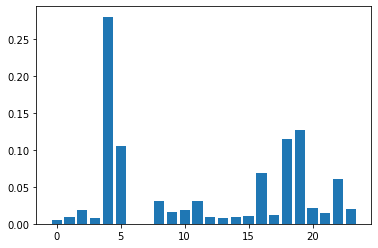

In [ ]:
y_pred = clf.predict(x_test_features)
acc = accuracy_score(y_testt, y_pred)
print("Accuracy score: {}".format(acc))
report=classification_report(y_testt, y_pred,target_names=event_id.keys())
print("Report score:")
print(report)
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show() 

Text(69.0, 0.5, 'Truth')

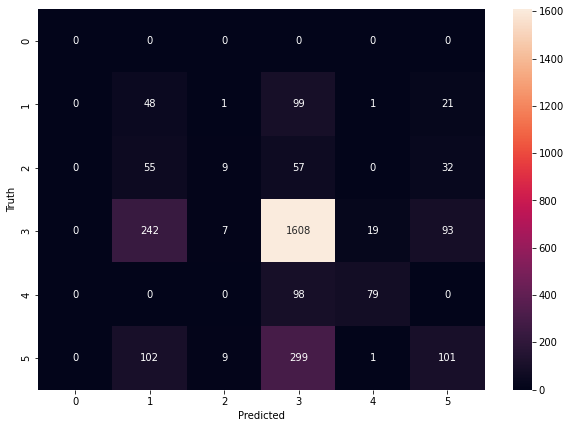

In [ ]:
cm = tf.math.confusion_matrix(labels = y_testt, predictions = y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##Model #3 "Support Vector Machine"

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train_features, y_trainn)

SVC()

In [ ]:
y_pred = clf.predict(x_test_features)
acc = accuracy_score(y_testt, y_pred)
print("Accuracy score: {}".format(acc))
report=classification_report(y_testt, y_pred,target_names=event_id.keys())
print("Report score:")
print(report)

Accuracy score: 0.6605166051660517
Report score:
                 precision    recall  f1-score   support

  Sleep stage W       0.00      0.00      0.00       170
  Sleep stage 1       0.00      0.00      0.00       153
  Sleep stage 2       0.66      1.00      0.80      1969
Sleep stage 3/4       0.00      0.00      0.00       177
  Sleep stage R       0.00      0.00      0.00       512

       accuracy                           0.66      2981
      macro avg       0.13      0.20      0.16      2981
   weighted avg       0.44      0.66      0.53      2981



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(69.0, 0.5, 'Truth')

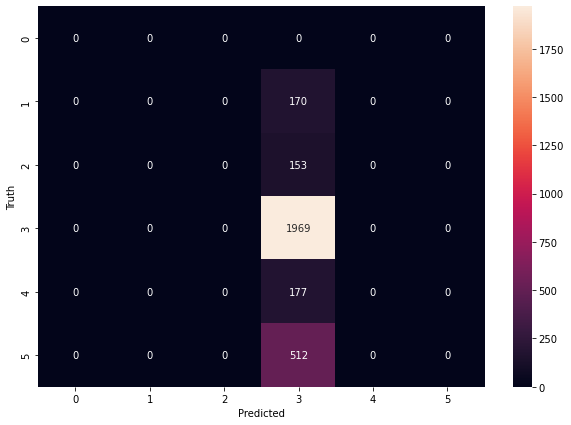

In [ ]:
cm = tf.math.confusion_matrix(labels = y_testt, predictions = y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##Model #4 "Decision Tree Classifier"

In [ ]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier()
clf1.fit(x_train_features, y_trainn)

DecisionTreeClassifier()

Accuracy score: 0.5132505870513251
Report score:
                 precision    recall  f1-score   support

  Sleep stage W       0.09      0.18      0.12       170
  Sleep stage 1       0.04      0.10      0.06       153
  Sleep stage 2       0.73      0.64      0.68      1969
Sleep stage 3/4       0.66      0.52      0.58       177
  Sleep stage R       0.31      0.26      0.29       512

       accuracy                           0.51      2981
      macro avg       0.37      0.34      0.35      2981
   weighted avg       0.59      0.51      0.54      2981

Feature: 0, Score: 0.03094
Feature: 1, Score: 0.02687
Feature: 2, Score: 0.02002
Feature: 3, Score: 0.02277
Feature: 4, Score: 0.16004
Feature: 5, Score: 0.06256
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.03072
Feature: 9, Score: 0.02619
Feature: 10, Score: 0.03809
Feature: 11, Score: 0.03051
Feature: 12, Score: 0.02419
Feature: 13, Score: 0.03215
Feature: 14, Score: 0.03312
Feature: 15, Score: 0.022

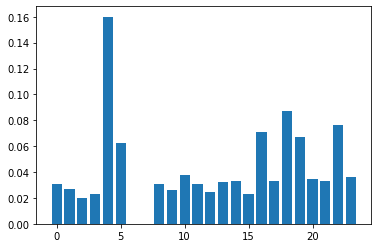

In [ ]:
y_pred = clf1.predict(x_test_features)
acc = accuracy_score(y_testt, y_pred)
print("Accuracy score: {}".format(acc))
report=classification_report(y_testt, y_pred,target_names=event_id.keys())
print("Report score:")
print(report)
importance = clf1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show() 

Text(69.0, 0.5, 'Truth')

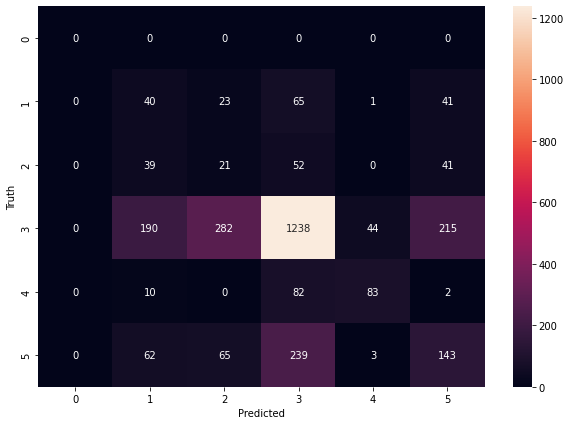

In [ ]:
cm = tf.math.confusion_matrix(labels = y_testt, predictions = y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')